 EE120 Fall 2016 Python #1, estimating h[n]: drum

To output python notebook, use ``ipython nbconvert file.ipynb'' from command prompt. 
This will generate a .html file which you can open in a browser and then print.
You may need to install pandoc first.

In [1]:
# coding: utf-8
# In[6]:
print 4+5  # check to see if iPython is running...
# get_ipython().magic(u'pylab')

9


In [2]:
import numpy as np
#import scipy as sp
import matplotlib.pyplot as plt
plt.close("all")   # try to close all open figs
# get_ipython().magic(u'matplotlib inline')
from IPython.display import Audio
#import scipy.io.wavfile as wav
from scipy.io import wavfile
print 'numpy version is', np.__version__
# next line is necessary for inline plots
%matplotlib inline

numpy version is 1.9.2


In [8]:
# import file
rate1,y= wavfile.read('Tight-High-Tom-lpf.wav')  # 16 bit data if from Audacity
print 'rate1 =', rate1
# this gives a warning: wavfile.py:172: WavFileWarning: Chunk (non-data) not understood, skipping it.
# seems to work anyway 

#print 'data1 =', data1
lengthIn = np.size(y)/2
print 'length In = ', lengthIn
t1 = np.linspace(0, float(lengthIn)/float(rate1), lengthIn)


rate1 = 44100
length In =  18969


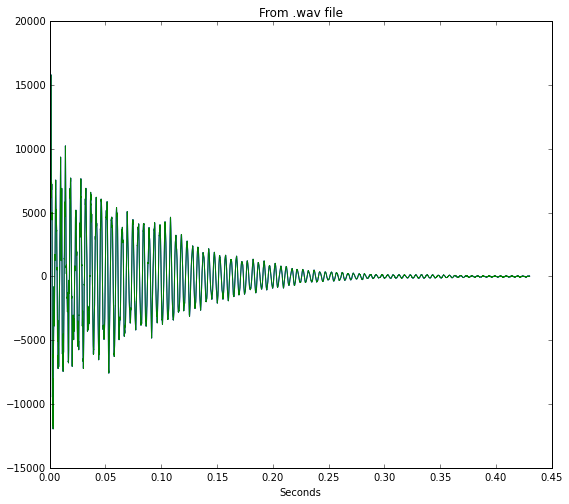

In [9]:
# plot data for input waveform
lengthIn = np.size(y)/2  # since stereo...
yLeft = np.zeros(lengthIn)
yRight = np.zeros(lengthIn)
for i in range(0,lengthIn):
   yLeft[i] = y[i][0] # copy left channel
   yRight[i] =  y[i][0]

height = 8
width = 9
fig = plt.figure(figsize = (width, height))
#_ = plt.plot(range(0,lengthIn), yLeft)
#_ = plt.plot(range(0,lengthIn), yRight)
_ = plt.plot(t1, yLeft)
_ = plt.plot(t1, yRight)
plt.title('From .wav file')
plt.xlabel('Seconds')

In the next cell, choose parameters. 
The parameters are the number of ``poles'' in the linear difference equation colDim and
the number of sounds samples to include for the least square fit: rowDim.

In [13]:
#******************** CHOOSE VALUES HERE

###################################
colDim=400 # choose number of states for LDE
rowDim = 1200 # choose number of samples
###################################

In [14]:
# construct matrix for least squares
# include scale term
V=np.zeros((rowDim,colDim))
data = yLeft[0:rowDim]  # only use left stereo channel
# homogeneous all-pole response (from initial condition)
# now write columns to array
for i in range(0,colDim):
    V[i:rowDim,i]=data[0:rowDim-i]

# now do least squares inverse
# s singular values, need to use x[n+1]
a,residuals,rank,s = np.linalg.lstsq(V, -yLeft[1:rowDim+1])   
# a are coefficients orders a1 a2 a3 ... aN
# y[n] = -a1 y[n-1] + ... -aN y[n-N] 

RMS err =2363.82  number of states= 400  number of samples=1200


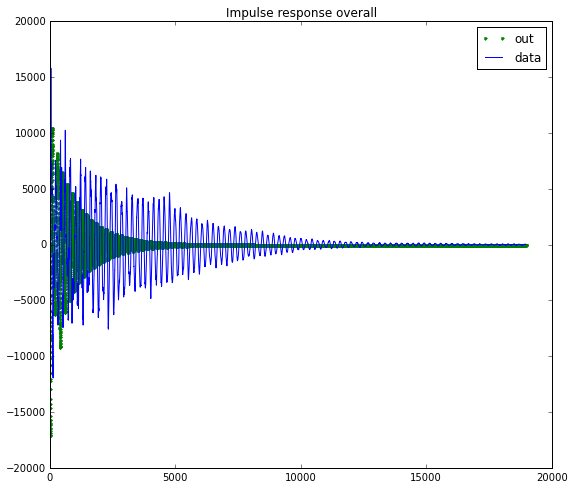

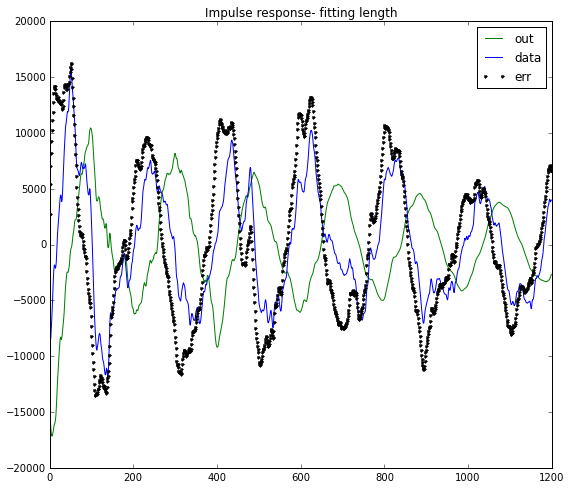

In [15]:
# calculate solution to all pole difference equation
state = np.zeros(colDim) # dimension of state vector = number of taps
state[0] = data[0]  # initial condition

numSamples = lengthIn # number of samples to calculate from LDE
out  = np.zeros(numSamples)  # answer

for i in range(0,numSamples):
    z = np.dot(-a,state)  # calculate next state
    state[1:colDim] = state[0:colDim-1]  # update state vector
    state[0] = z
    out[i] = z # store value for plotting
#    print 'state =', state
    if np.abs(z) > 20e4:     #  probably going unstable, quit loop
            break
    
if i < (numSamples-1):
    print 'out of bounds. step i=%d, z=%10.3f' %(i,z)

# compare model to original signal over range
err = np.zeros(numSamples)
err = yLeft[0:numSamples] - out
rmsErr = np.linalg.norm(err)/np.sqrt(numSamples)
print 'RMS err =%7.2f  number of states= %d  number of samples=%d'  %(rmsErr, colDim, rowDim)
    
height = 8
width = 9
fig = plt.figure(figsize = (width, height)) 
plt.title('Impulse response overall')
_ = plt.plot(range(0,numSamples), out, 'g.')  
_ = plt.plot(range(0,numSamples), yLeft[0:numSamples], 'b-') 
#_ = plt.plot(range(0,numSamples), err[0:numSamples], 'k.') 
plt.legend(['out', 'data', 'err'])

# just plot residual
height = 8
width = 9
fig = plt.figure(figsize = (width, height)) 
plt.title('Impulse response- fitting length')
_ = plt.plot(range(0,rowDim), out[0:rowDim], 'g-')  
_ = plt.plot(range(0,rowDim), yLeft[0:rowDim], 'b') 
_ = plt.plot(range(0,rowDim), err[0:rowDim], 'k.') 
plt.legend(['out', 'data', 'err'])
